<a href="https://colab.research.google.com/github/jacobpad/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/UPDATED_LS_DS_432_Convolution_Neural_Networks_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras.  
Classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`).  
Treat mountains as the positive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](https://raw.githubusercontent.com/jacobpad/DS-Unit-4-Sprint-3-Deep-Learning/master/module2-convolutional-neural-networks/data/mountain/land10.jpg)|![](https://raw.githubusercontent.com/jacobpad/DS-Unit-4-Sprint-3-Deep-Learning/master/module2-convolutional-neural-networks/data/forest/cdmc306.jpg)|

The problem is relatively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several different possible models.

## Pre - Trained Model
<a id="p1"></a>

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`). Treat mountains as the positive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pre-trained layers from resnet
4. Report your model's accuracy

When the time comes:

```
# Run this code - because it helps life get easier.
################################################################################
# Load a pretrained network from Keras, ResNet50 - a 50 layer deep network 
#   trained to recognize 1000 objects. Starting usage:

import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential, Model 

resnet = ResNet50(weights='imagenet', include_top=False)

################################################################################
# The include_top parameter in ResNet50 will remove the full connected layers 
#   from the ResNet model. The next step is to turn off the training of the 
#   ResNet layers. We want to use the learned parameters without updating them 
#   in future training passes.

for layer in resnet.layers:
    layer.trainable = False

################################################################################
# Using the Keras functional API, we will need to additional additional full 
#   connected layers to our model. We we removed the top layers, we removed all 
#   reivous fully connected layers. In other words, we kept only the feature 
#   processing portions of our network. You can expert with additional layers 
#   beyond what's listed here. The GlobalAveragePooling2D layer functions as a 
#   really fancy flatten function by taking the average of each of the last 
#   convolutional layer outputs (which is two dimensional still).

x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Instatiate Model
model = Model(resnet.input, predictions)
```

## Load in Data

This surprisingly more difficult than it seems, because you are working with directories of images instead of a single file. This boiler plate will help you download a zipped version of the directory of images. The directory is organized into "train" and "validation" which you can use inside an `ImageGenerator` class to stream batches of images thru your model.  

### Download & Summarize the Data

This step is completed for you. Just run the cells and review the results. 

In [1]:
# Run this code - because it helps things work.

import tensorflow as tf
import os

_URL = 'https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/data.zip?raw=true'

path_to_zip = tf.keras.utils.get_file('./data.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'data')

################################################################################
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

################################################################################
# directory with our training mointain pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')  

# directory with our training forest pictures
train_forest_dir = os.path.join(train_dir, 'forest')  

# directory with our validation mointain pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  

# directory with our validation forest pictures
validation_forest_dir = os.path.join(validation_dir, 'forest')  

################################################################################
num_mountain_tr = len(os.listdir(train_mountain_dir))
num_forest_tr = len(os.listdir(train_forest_dir))

num_mountain_val = len(os.listdir(validation_mountain_dir))
num_forest_val = len(os.listdir(validation_forest_dir))

total_train = num_mountain_tr + num_forest_tr
total_val = num_mountain_val + num_forest_val

################################################################################
print('total training mountain images:', num_mountain_tr)
print('total training forest images:', num_forest_tr)
print('total validation mountain images:', num_mountain_val)
print('total validation forest images:', num_forest_val)
print("------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training mountain images: 254
total training forest images: 270
total validation mountain images: 125
total validation forest images: 62
------
Total training images: 524
Total validation images: 187


### Keras `ImageGenerator` to Process the Data

This step is completed for you, but please review the code. The `ImageGenerator` class reads in batches of data from a directory and pass them to the model one batch at a time. Just like large text files, this method is advantageous, because it stifles the need to load a bunch of images into memory. 

Check out the documentation for this class method: [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class). You'll expand it's use in the third assignment objective.

In [0]:
# Run these four code blocks - because it helps things work and does some stuff.

batch_size = 16
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224
# CHNLS = 3

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255) 

# Generator for our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [4]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, 
                                                                        IMG_WIDTH, 
                                                                        # CHNLS
                                                                        ),
                                                           class_mode='binary')

Found 533 images belonging to 2 classes.


In [5]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, 
                                                                           IMG_WIDTH, 
                                                                          #  CHNLS
                                                                           ),
                                                              class_mode='binary')

Found 195 images belonging to 2 classes.


# Student work begins here:

## Instatiate Model

In [0]:
# # Run this code - because it helps life get easier.
# ################################################################################
# # Load a pretrained network from Keras, ResNet50 - a 50 layer deep network 
# #   trained to recognize 1000 objects. Starting usage:
 
# import numpy as np
# from tensorflow.keras import datasets
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.models import Sequential, Model 
 
# resnet = ResNet50(weights='imagenet', include_top=False)
 
# ################################################################################
# # The include_top parameter in ResNet50 will remove the full connected layers 
# #   from the ResNet model. The next step is to turn off the training of the 
# #   ResNet layers. We want to use the learned parameters without updating them 
# #   in future training passes.
 
# for layer in resnet.layers:
#     layer.trainable = False
 
# ################################################################################
# # Using the Keras functional API, we will need to additional additional full 
# #   connected layers to our model. We we removed the top layers, we removed all 
# #   reivous fully connected layers. In other words, we kept only the feature 
# #   processing portions of our network. You can expert with additional layers 
# #   beyond what's listed here. The GlobalAveragePooling2D layer functions as a 
# #   really fancy flatten function by taking the average of each of the last 
# #   convolutional layer outputs (which is two dimensional still).
 
# x = resnet.output
# x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(1, activation='sigmoid')(x)
 
# # Instatiate Model
# model = Model(resnet.input, predictions)

In [0]:
import numpy as np
 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API
 
# Load the trained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False)

In [0]:
for layer in resnet.layers:
    layer.trainable = False

In [0]:
# Re-add dense layers (explained above)
x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

## Compile Model

In [0]:
# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Fit Model

In [12]:
# Fit Model
history = model.fit(train_data_gen, 
                    steps_per_epoch=total_train // batch_size, epochs=epochs, 
                    validation_data=val_data_gen,  
                    validation_steps=total_val // batch_size
                    )

Epoch 1/50
32/32 [==============================] - 4s 131ms/step - loss: 0.7659 - accuracy: 0.5762 - val_loss: 0.6208 - val_accuracy: 0.6761
Epoch 2/50
32/32 [==============================] - 4s 117ms/step - loss: 0.6767 - accuracy: 0.6148 - val_loss: 0.5418 - val_accuracy: 0.6871
Epoch 3/50
32/32 [==============================] - 3s 102ms/step - loss: 0.5578 - accuracy: 0.7026 - val_loss: 0.4921 - val_accuracy: 0.8405
Epoch 4/50
32/32 [==============================] - 3s 101ms/step - loss: 0.5020 - accuracy: 0.7824 - val_loss: 0.4593 - val_accuracy: 0.8589
Epoch 5/50
32/32 [==============================] - 3s 103ms/step - loss: 0.4792 - accuracy: 0.7804 - val_loss: 0.4578 - val_accuracy: 0.8589
Epoch 6/50
32/32 [==============================] - 3s 102ms/step - loss: 0.4165 - accuracy: 0.8204 - val_loss: 0.3573 - val_accuracy: 0.9018
Epoch 7/50
32/32 [==============================] - 3s 102ms/step - loss: 0.4795 - accuracy: 0.7565 - val_loss: 0.4240 - val_accuracy: 0.7607
Epoch 

In [13]:
# Check shape
train_data_gen.image_shape

(224, 224, 3)

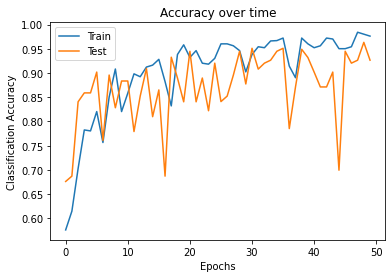

In [14]:
import matplotlib.pyplot as plt

# Graph accuracy over time
eps = range(len(history.history['accuracy']))
plt.plot(eps, history.history['accuracy'], label='Train')
plt.plot(eps, history.history['val_accuracy'], label='Test')

plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()


# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', 
                 input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 760384)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                48664640  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 48,684,097
Trainable params: 48,684,097
Non-trainable params: 0
____________________________________________

In [0]:
# Compile Model
# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Fit Model
# Fit Model
history = model.fit(train_data_gen, 
                    steps_per_epoch=total_train // batch_size, epochs=epochs, 
                    validation_data=val_data_gen,  
                    validation_steps=total_val // batch_size
                    )

Epoch 1/50
32/32 [==============================] - 2s 77ms/step - loss: 2.7915 - accuracy: 0.5250 - val_loss: 0.6028 - val_accuracy: 0.7423
Epoch 2/50
32/32 [==============================] - 2s 73ms/step - loss: 0.4706 - accuracy: 0.8652 - val_loss: 0.5218 - val_accuracy: 0.9205
Epoch 3/50
32/32 [==============================] - 2s 72ms/step - loss: 0.3626 - accuracy: 0.9042 - val_loss: 0.1893 - val_accuracy: 0.9205
Epoch 4/50
32/32 [==============================] - 2s 72ms/step - loss: 0.2040 - accuracy: 0.9122 - val_loss: 0.2166 - val_accuracy: 0.9264
Epoch 5/50
32/32 [==============================] - 2s 72ms/step - loss: 0.1346 - accuracy: 0.9501 - val_loss: 0.1593 - val_accuracy: 0.9202
Epoch 6/50
32/32 [==============================] - 2s 69ms/step - loss: 0.0695 - accuracy: 0.9741 - val_loss: 0.2248 - val_accuracy: 0.9202
Epoch 7/50
32/32 [==============================] - 2s 69ms/step - loss: 0.1397 - accuracy: 0.9341 - val_loss: 0.4356 - val_accuracy: 0.8405
Epoch 8/50
32

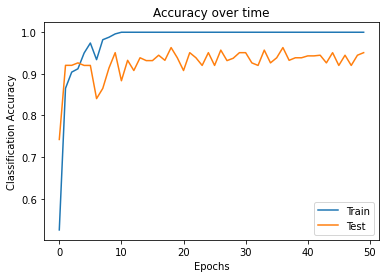

In [18]:
import matplotlib.pyplot as plt

# Graph accuracy over time
eps = range(len(history.history['accuracy']))
plt.plot(eps, history.history['accuracy'], label='Train')
plt.plot(eps, history.history['val_accuracy'], label='Test')

plt.title('Accuracy over time')
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()


# Custom CNN Model with Image Manipulations

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Simply, you should be able to modify our image generator for the problem. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [0]:
# State Code for Image Manipulation Here

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language